<font color='red'  size=7>Fuzzy Project</font>

<font   size=6> [1] : Problem Statement</font> 

## القيام ببناء نظام خبير لتشخيص مرض المريض بناءً على  الأعراض والعمر والتاريخ الطبي


## تشخيص مرض القلب



### Prepare libraries and data

In [1]:
from tkinter import *
from tkinter import messagebox as mb
import json

import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

import pandas as pd

<font   size=6> [2] : Fuzzy Sets</font> 

## Input :  symptoms, age, and medical history

In [2]:
Age = ctrl.Antecedent(np.arange(0, 101, 1), 'Age')
Blood_Pressure_systolic = ctrl.Antecedent(np.arange(0, 301,1), 'Blood Pressure systolic')## ضغط الدم الانقباضي
Cholesterol = ctrl.Antecedent(np.arange(0, 551, 1), 'Cholesterol')
Maximum_Heart_Rate =ctrl.Antecedent(np.arange(0, 501, 1), 'Heart Rate')
ECG= ctrl.Antecedent(np.arange(-0.5, 2.5, 0.01), 'ECG') ## تخطيط القلب الكهربائي

## Output : Disease

In [3]:
Diagnosis_Heart_Diseases = ctrl.Consequent(np.arange(0, 4,0.01), 'Heart Disease')

<font   size=6> [3] : Membership Functions</font> 

In [4]:
### INPUT 
def ageMembershipe(Age: ctrl.Antecedent):

    Age['young'] = fuzz.trapmf(Age.universe, [0, 0,29, 38])
    Age['mild'] = fuzz.trimf(Age.universe, [33, 38, 45])
    Age['Old'] = fuzz.trimf(Age.universe, [40, 48, 58])
    Age['very Old'] = fuzz.trapmf(Age.universe, [52, 60, 100,100])

def bloodPressureMsh(Blood_Pressure_systolic:ctrl.Antecedent):
    
    Blood_Pressure_systolic['Low'] = fuzz.trapmf(Blood_Pressure_systolic.universe, [0, 0,111, 134])
    Blood_Pressure_systolic['Medium'] = fuzz.trimf(Blood_Pressure_systolic.universe, [127, 139,153])
    Blood_Pressure_systolic['High'] = fuzz.trimf(Blood_Pressure_systolic.universe, [142, 157,172])
    Blood_Pressure_systolic['very High'] = fuzz.trapmf(Blood_Pressure_systolic.universe, [154,171,300,300])


def cholesterolMsh(Cholesterol: ctrl.Antecedent):
    
    Cholesterol['Low'] = fuzz.trapmf(Cholesterol.universe, [0, 0,151, 197])
    Cholesterol['Medium'] = fuzz.trimf(Cholesterol.universe, [188,215,250])
    Cholesterol['High'] = fuzz.trimf(Cholesterol.universe, [217, 263,307])
    Cholesterol['very High'] = fuzz.trapmf(Cholesterol.universe, [281, 347, 550,550])

def maximum_heart_rateMsh(Maximum_Heart_Rate:ctrl.Antecedent ):
    
    Maximum_Heart_Rate['low']= fuzz.trapmf(Maximum_Heart_Rate.universe, [0, 0,100, 141])
    Maximum_Heart_Rate['medium']= fuzz.trimf(Maximum_Heart_Rate.universe, [111,152,194])
    Maximum_Heart_Rate['high']= fuzz.trapmf(Maximum_Heart_Rate.universe, [152, 210,500, 500])


def ecgMsh(ECG: ctrl.Antecedent):

    ECG['Normal']= fuzz.trapmf(ECG.universe, [-0.5, -0.5,0, 0.4])
    ECG['ST-T abnormal']= fuzz.trimf(ECG.universe, [0.2,1,1.8])
    ECG['Hypertrophy']=  fuzz.trapmf(ECG.universe, [1.4,1.9,2.5,2.5])



###  OUTPUT     
 
def predictionType(Diagnosis_Heart_Diseases: ctrl.Consequent ):
    Diagnosis_Heart_Diseases['Healthy'] = fuzz.trapmf(Diagnosis_Heart_Diseases.universe, [0, 0,0.25,1])
    Diagnosis_Heart_Diseases['Sick1'] = fuzz.trimf(Diagnosis_Heart_Diseases.universe, [0,1,2])
    Diagnosis_Heart_Diseases['Sick2'] = fuzz.trimf(Diagnosis_Heart_Diseases.universe, [1,2,3])
    Diagnosis_Heart_Diseases['Sick3'] = fuzz.trimf(Diagnosis_Heart_Diseases.universe, [2,3,4])
    Diagnosis_Heart_Diseases['Sick4'] = fuzz.trapmf(Diagnosis_Heart_Diseases.universe, [3,3.75,4,4])


    
ageMembershipe(Age=Age)
bloodPressureMsh(Blood_Pressure_systolic=Blood_Pressure_systolic)
cholesterolMsh(Cholesterol=Cholesterol)
maximum_heart_rateMsh(Maximum_Heart_Rate=Maximum_Heart_Rate)
ecgMsh(ECG=ECG)
predictionType(Diagnosis_Heart_Diseases=Diagnosis_Heart_Diseases)

## The view methods

C:\Users\HP\anaconda3\envs\Vision\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


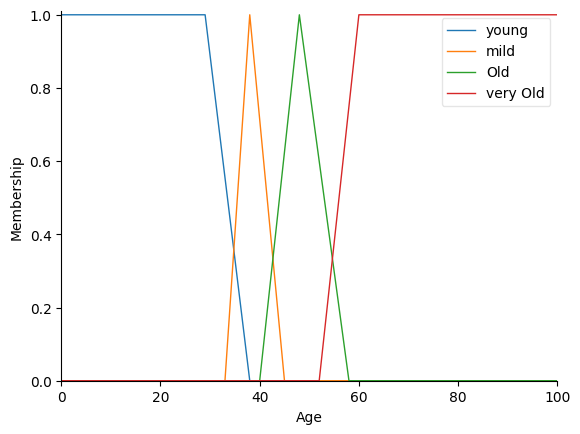

In [5]:
Age.view()

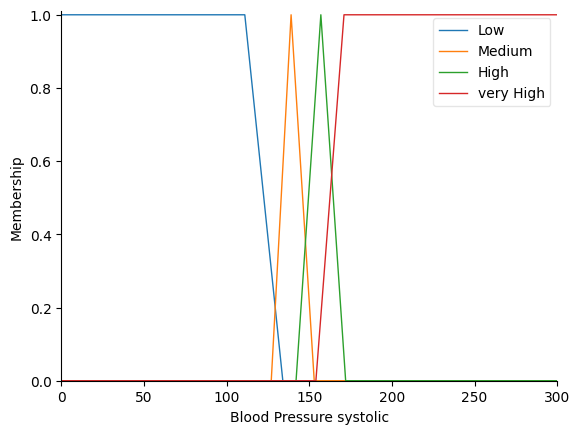

In [6]:
Blood_Pressure_systolic.view()

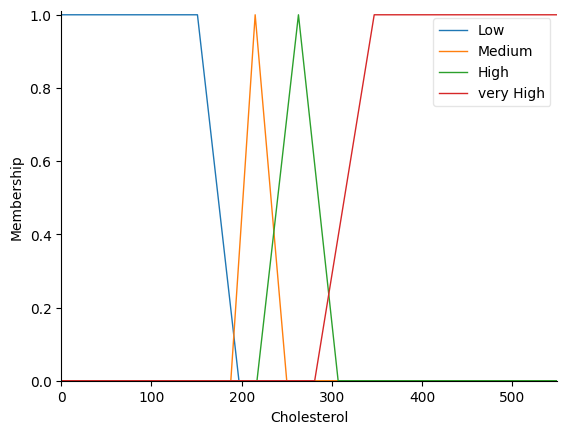

In [7]:
Cholesterol.view()

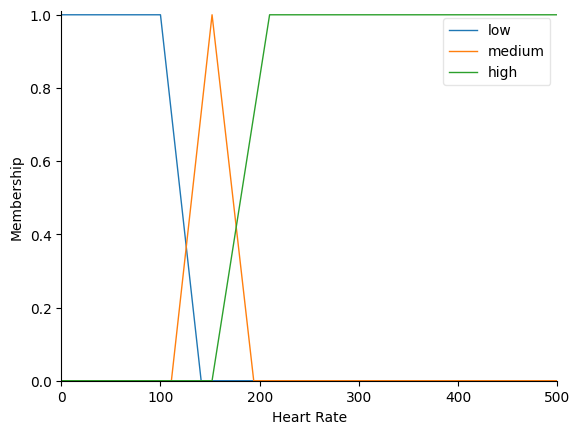

In [8]:
Maximum_Heart_Rate.view()

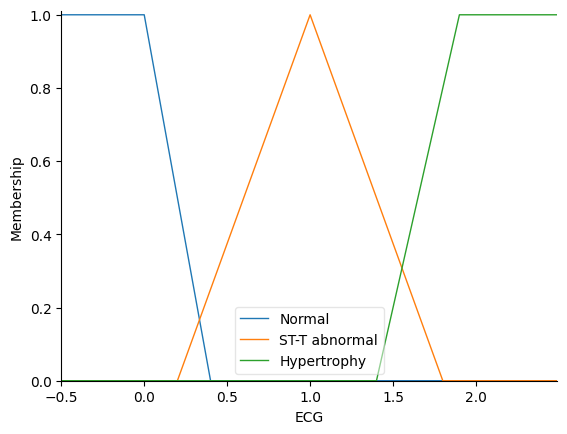

In [9]:
ECG.view()

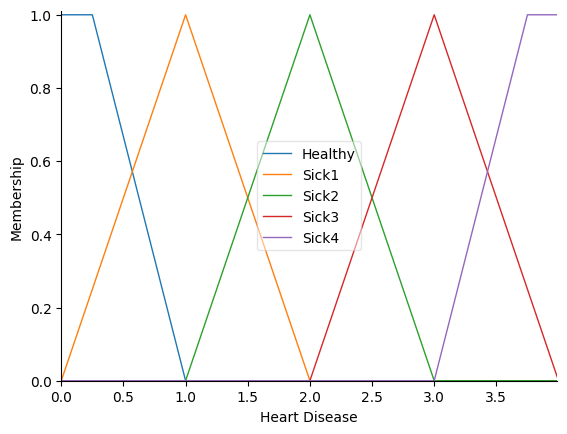

In [10]:
Diagnosis_Heart_Diseases.view()

<font   size=6> [4] : Rule Base</font> 

In [11]:
def buildRules(Age:ctrl.Antecedent,Blood_Pressure_systolic:ctrl.Antecedent,Cholesterol:ctrl.Antecedent,Maximum_Heart_Rate:ctrl.Antecedent,ECG:ctrl.Antecedent,Diagnosis_Heart_Diseases:ctrl.Consequent):
    
    return[
    ctrl.Rule(Age['Old'] & Maximum_Heart_Rate['high'],Diagnosis_Heart_Diseases['Sick4']) ,
    ctrl.Rule(Blood_Pressure_systolic['High'] | Maximum_Heart_Rate['low'],Diagnosis_Heart_Diseases['Sick1']),
    ctrl.Rule(Blood_Pressure_systolic['Low'],Diagnosis_Heart_Diseases['Healthy']),

    ctrl.Rule(Blood_Pressure_systolic['Medium'],Diagnosis_Heart_Diseases['Sick1']),
    ctrl.Rule(Blood_Pressure_systolic['High'],Diagnosis_Heart_Diseases['Sick2']),
    ctrl.Rule(Blood_Pressure_systolic['High'],Diagnosis_Heart_Diseases['Sick3']),
    ctrl.Rule(Blood_Pressure_systolic['very High'],Diagnosis_Heart_Diseases['Sick4']),


    ctrl.Rule(Cholesterol['Low'],Diagnosis_Heart_Diseases['Healthy']),
    ctrl.Rule(Cholesterol['Medium'],Diagnosis_Heart_Diseases['Sick1']),
    ctrl.Rule(Cholesterol['High'],Diagnosis_Heart_Diseases['Sick2']),
    ctrl.Rule(Cholesterol['High'],Diagnosis_Heart_Diseases['Sick3']),
    ctrl.Rule(Cholesterol['very High'],Diagnosis_Heart_Diseases['Sick4']),

    ctrl.Rule(Age['young'] ,Diagnosis_Heart_Diseases['Healthy']),
    ctrl.Rule(Age['mild'],Diagnosis_Heart_Diseases['Sick1']),
    ctrl.Rule(Age['Old'],Diagnosis_Heart_Diseases['Sick2']),
    ctrl.Rule(Age['Old'],Diagnosis_Heart_Diseases['Sick3']),
    ctrl.Rule(Age['very Old'],Diagnosis_Heart_Diseases['Sick4']),

    ctrl.Rule(ECG['Normal'],Diagnosis_Heart_Diseases['Healthy']),
    ctrl.Rule(ECG['Normal'],Diagnosis_Heart_Diseases['Sick1']),
    ctrl.Rule(ECG['ST-T abnormal'],Diagnosis_Heart_Diseases['Sick2']),
    ctrl.Rule(ECG['Hypertrophy'],Diagnosis_Heart_Diseases['Sick3']),
    ctrl.Rule(ECG['Hypertrophy'],Diagnosis_Heart_Diseases['Sick4']),


    ctrl.Rule(Maximum_Heart_Rate['low'],Diagnosis_Heart_Diseases['Healthy']),
    ctrl.Rule(Maximum_Heart_Rate['medium'],Diagnosis_Heart_Diseases['Sick1']),
    ctrl.Rule(Maximum_Heart_Rate['medium'],Diagnosis_Heart_Diseases['Sick2']),
    ctrl.Rule(Maximum_Heart_Rate['high'],Diagnosis_Heart_Diseases['Sick3']),
    ctrl.Rule(Maximum_Heart_Rate['high'],Diagnosis_Heart_Diseases['Sick4'])
   
    
]

rules = buildRules(
   Age=Age,
    Blood_Pressure_systolic=Blood_Pressure_systolic,
    Cholesterol=Cholesterol,
    Maximum_Heart_Rate=Maximum_Heart_Rate,
    ECG=ECG,
    Diagnosis_Heart_Diseases=Diagnosis_Heart_Diseases)


(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

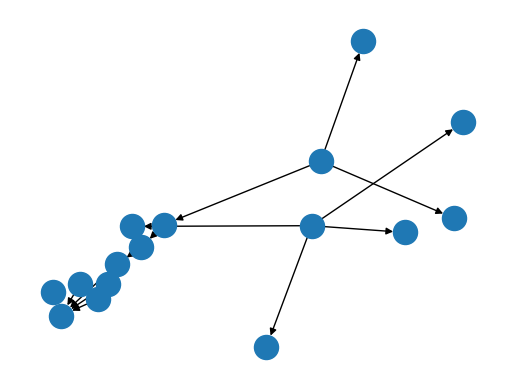

In [12]:
rule1=ctrl.Rule(Blood_Pressure_systolic['High'] | Maximum_Heart_Rate['low'],Diagnosis_Heart_Diseases['Sick1'])
rule1.view()

<font   size=6> [5] :Inference Engine</font> 

In [13]:
Diagnosis_Diseases = ctrl.ControlSystem(rules)
Diagnosis_Diseases_Simulation = ctrl.ControlSystemSimulation(Diagnosis_Diseases)

In [14]:
Diagnosis_Diseases_Simulation.input['Age']=60
Diagnosis_Diseases_Simulation.input['Blood Pressure systolic']=117
Diagnosis_Diseases_Simulation.input['Cholesterol']=230
Diagnosis_Diseases_Simulation.input['Heart Rate']=160
Diagnosis_Diseases_Simulation.input['ECG']=0

# Diagnosis_Diseases_Simulation.input['Age']=67
# Diagnosis_Diseases_Simulation.input['Blood Pressure systolic']=120
# Diagnosis_Diseases_Simulation.input['Cholesterol']=229
# Diagnosis_Diseases_Simulation.input['Heart Rate']=129
# Diagnosis_Diseases_Simulation.input['ECG']=2



In [15]:
Diagnosis_Diseases_Simulation.compute()
Diagnosis = Diagnosis_Diseases_Simulation.output['Heart Disease']
Diagnosis

1.8520982464693325

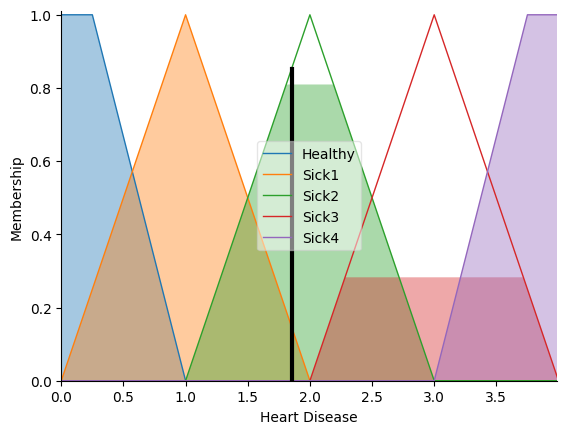

In [16]:
Diagnosis_Heart_Diseases.view(sim=Diagnosis_Diseases_Simulation)

<font   size=6> [6] :Deffuzication</font> 

In [17]:
def outputsick_healthy(x):
    if 0 <= x <= 0.25:
        return 1.0
    elif 0.25 < x <= 1:
        return (-1.0 / 0.75) * x + 1 / 0.75
    else:
        return 0.0

def outputsick_sick1(x):
    if 0 <= x <= 1:
        return 1.0 * x
    elif 1 < x <= 2:
        return (-1.0) * x + 2
    else:
        return 0.0

def outputsick_sick2(x):
    if 1 <= x <= 2:
        return 1.0 * x - 1
    elif 2 < x <= 3:
        return (-1.0) * x + 3.0
    else:
        return 0.0

def outputsick_sick3(x):
    if 2 <= x <= 3:
        return 1.0 * x - 2.0
    elif 3 < x <= 4:
        return -1.0 * x + 4.0
    else:
        return 0

def outputsick_sick4(x):
    if 0 <= x <= 3:
        return 0.0
    elif 3 < x <= 3.75:
        return (1.0 / 0.75) * x - 3.0 / 0.75
    else:
        return 1.0

In [18]:
dic={'healthy':0,
    'sick1':0,
    'sick2':0,
    'sick3':0,
    'sick4':0}


def output1(diagnosis):
    healthy=outputsick_healthy(diagnosis)
    if healthy >= 0:
       dic['healthy']=healthy

    sick1=outputsick_sick1(diagnosis)
    if sick1 >= 0:
       dic['sick1']=sick1


    sick2=outputsick_sick2(diagnosis)
    if sick2 >= 0:
       dic['sick2']=sick2

    sick3=outputsick_sick3(diagnosis)
    if sick3 >= 0:
       dic['sick3']=sick3

    sick4=outputsick_sick4(diagnosis)
    if sick4 >= 0:
       dic['sick4']=sick4
    
    print(dic,max(dic.values()))

    max_value = max(dic, key=dic.get)
    print(max_value)
    return max_value

In [19]:
output1(Diagnosis)

{'healthy': 0.0, 'sick1': 0.14790175353066748, 'sick2': 0.8520982464693325, 'sick3': 0, 'sick4': 0.0} 0.8520982464693325
sick2


'sick2'

<font   size=6> [7] :User Interface</font> 

In [20]:
def output_Diagnosis(ECG_input,age_input, blood_input,chol_input,heart_input):
    
    Diagnosis_Diseases_Simulation.input['ECG'] = ECG_input
    Diagnosis_Diseases_Simulation.input['Age'] = age_input
    Diagnosis_Diseases_Simulation.input['Blood Pressure systolic'] = blood_input
    Diagnosis_Diseases_Simulation.input['Cholesterol'] = chol_input
    Diagnosis_Diseases_Simulation.input['Heart Rate']=heart_input

    Diagnosis_Diseases_Simulation.compute()

    Diagnosis = Diagnosis_Diseases_Simulation.output['Heart Disease']

    x=Diagnosis_Heart_Diseases.view(sim=Diagnosis_Diseases_Simulation)
    
    return Diagnosis,x

2.164306302869166
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.835693697130834, 'sick3': 0.16430630286916603, 'sick4': 0.0} 0.835693697130834
sick2


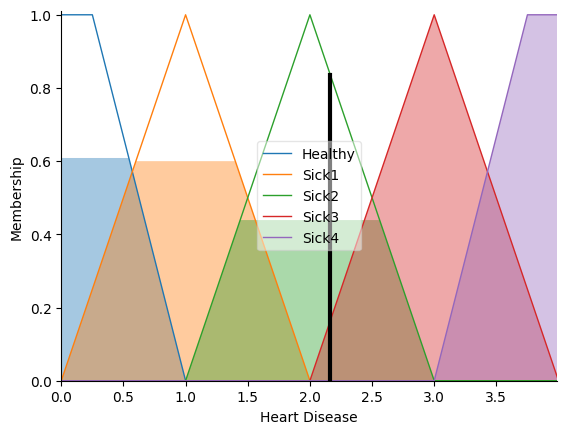

In [21]:
import sys
from tkinter import *
import tkinter.ttk as ttk
from PIL import Image, ImageTk
import threading

def vp_start_gui():
    global val, w, root
    root = Tk()
    top = New_Toplevel_1 (root)
    root.mainloop()

w = None
def create_New_Toplevel_1(root, *args, **kwargs):
    global w, w_win, rt
    rt = root
    w = Toplevel (root)
    top = New_Toplevel_1 (w)
    return (w, top)

def destroy_New_Toplevel_1():
    global w
    w.destroy()
    w = None

class New_Toplevel_1:
    def __init__(self, top=None):
        '''This class configures and populates the toplevel window.
           top is the toplevel containing window.'''
        _bgcolor = 'tomato'  
        _fgcolor = '#000000' 
        _compcolor = '#d9d9d9' 
        _ana1color = '#d9d9d9' 
        _ana2color = '#d9d9d9' 
        font11 = "-family Arial -size 19 -weight normal -slant roman "  \
            "-underline 0 -overstrike 0"
        font12 = "-family Arial -size 12 -weight normal -slant roman "  \
            "-underline 0 -overstrike 0"
        font14 = "-family Arial -size 15 -weight normal -slant roman "  \
            "-underline 0 -overstrike 0"
        font15 = "-family Arial -size 12 -weight bold -slant roman "  \
            "-underline 0 -overstrike 0"
        self.style = ttk.Style()
        if sys.platform == "win32":
            self.style.theme_use('winnative')
        self.style.configure('.',background=_bgcolor)
        self.style.configure('.',foreground=_fgcolor)
        self.style.configure('.',font="TkDefaultFont")
        self.style.map('.',background=
            [('selected', _compcolor), ('active',_ana2color)])

        top.geometry("968x493+919+245")
        top.title("Diagnosis of Heart Disease Fuzzy System")
        top.configure(background="#d9d9d9")
        top.configure(highlightbackground="#b9b9b9")
        top.configure(highlightcolor="black")

        self.TFrame1 = ttk.Frame(top)
        self.TFrame1.place(relx=0.01, rely=0.02, relheight=0.94, relwidth=0.48)
        self.TFrame1.configure(relief=GROOVE)
        self.TFrame1.configure(borderwidth="2")
        self.TFrame1.configure(relief=GROOVE)
        self.TFrame1.configure(width=465)

        self.TLabel1 = ttk.Label(self.TFrame1)
        self.TLabel1.place(relx=0.2, rely=0.04, height=32, width=350)
        self.TLabel1.configure(background=_bgcolor)
        self.TLabel1.configure(foreground="#000000")
        self.TLabel1.configure(font=font11)
        self.TLabel1.configure(relief=FLAT)
        self.TLabel1.configure(text='''Enter Patient's data ''')

#-----------------------------------ECG----------------------------------------
        self.TLabel3 = ttk.Label(self.TFrame1)
        self.TLabel3.place(relx=0.04, rely=0.53, height=39, width=120)
        self.TLabel3.configure(background=_bgcolor)
        self.TLabel3.configure(foreground="#000000")
        self.TLabel3.configure(font=font12)
        self.TLabel3.configure(relief=FLAT)
        self.TLabel3.configure(text='''ECG''')

        self.TEntry_ECG = ttk.Entry(self.TFrame1)
        self.TEntry_ECG.place(relx=0.24, rely=0.53, relheight=0.05
                , relwidth=0.53)
        self.TEntry_ECG.configure(width=246)
        self.TEntry_ECG.configure(takefocus="")
        self.TEntry_ECG.configure(cursor="ibeam")


#----------------------------------------Blood Pressure systolic----------------------------------

        self.TLabel5 = ttk.Label(self.TFrame1)
        self.TLabel5.place(relx=0.04, rely=0.43, height=39, width=120)
        self.TLabel5.configure(background=_bgcolor)
        self.TLabel5.configure(foreground="#000000")
        self.TLabel5.configure(font=font12)
        self.TLabel5.configure(relief=FLAT)
        self.TLabel5.configure(text='''Blood Pressure''')

        self.TEntry_blood = ttk.Entry(self.TFrame1)
        self.TEntry_blood.place(relx=0.24, rely=0.43, relheight=0.05
                , relwidth=0.53)
        self.TEntry_blood.configure(width=246)
        self.TEntry_blood.configure(takefocus="")
        self.TEntry_blood.configure(cursor="ibeam")

#-----------------------------Cholesterol-----------------------------------------

        self.TLabel6 = ttk.Label(self.TFrame1)
        self.TLabel6.place(relx=0.04, rely=0.33, height=39, width=120)
        self.TLabel6.configure(background=_bgcolor)
        self.TLabel6.configure(foreground="#000000")
        self.TLabel6.configure(font=font12)
        self.TLabel6.configure(relief=FLAT)
        self.TLabel6.configure(text='''Cholesterol''')

        self.TEntry_cholesterolt = ttk.Entry(self.TFrame1)
        self.TEntry_cholesterolt.place(relx=0.24, rely=0.33, relheight=0.05
                , relwidth=0.53)
        self.TEntry_cholesterolt.configure(width=246)
        self.TEntry_cholesterolt.configure(takefocus="")
        self.TEntry_cholesterolt.configure(cursor="ibeam")

#-----------------------------Heart Rate--------------------------------------

        self.TLabel4 = ttk.Label(self.TFrame1)
        self.TLabel4.place(relx=0.04, rely=0.23, height=39, width=120)
        self.TLabel4.configure(background=_bgcolor)
        self.TLabel4.configure(foreground="#000000")
        self.TLabel4.configure(font=font12)
        self.TLabel4.configure(relief=FLAT)
        self.TLabel4.configure(text='''Heart Rate''')

        self.TEntry_heart = ttk.Entry(self.TFrame1)
        self.TEntry_heart.place(relx=0.24, rely=0.23, relheight=0.05
                , relwidth=0.53)
        self.TEntry_heart.configure(width=246)
        self.TEntry_heart.configure(takefocus="")
        self.TEntry_heart.configure(cursor="ibeam")


#-----------------------------Age-----------------------------------------

        self.TLabel6 = ttk.Label(self.TFrame1)
        self.TLabel6.place(relx=0.04, rely=0.63, height=39, width=120)
        self.TLabel6.configure(background=_bgcolor)
        self.TLabel6.configure(foreground="#000000")
        self.TLabel6.configure(font=font12)
        self.TLabel6.configure(relief=FLAT)
        self.TLabel6.configure(text='''Age''')

        self.TEntry_Age = ttk.Entry(self.TFrame1)
        self.TEntry_Age.place(relx=0.24, rely=0.63, relheight=0.05
                              , relwidth=0.53)
        self.TEntry_Age.configure(width=246)
        self.TEntry_Age.configure(takefocus="")
        self.TEntry_Age.configure(cursor="ibeam")
# -----------------------------------------------------------------------

        self.TButton_eval = ttk.Button(self.TFrame1)
        self.TButton_eval.place(relx=0.34, rely=0.90, height=35, width=126)
        self.TButton_eval.configure(takefocus="")
        self.TButton_eval.configure(text='''Evaluate''')
        self.TButton_eval.bind('<Button-1>',lambda e:main_support.TButton_eval_onClick(e))


        self.TLabel_Indicator = ttk.Label(self.TFrame1)
        self.TLabel_Indicator.place(relx=0.29, rely=0.80, height=19, width=184)
        self.TLabel_Indicator.configure(background=_bgcolor)
        self.TLabel_Indicator.configure(foreground="#000000")
        self.TLabel_Indicator.configure(relief=FLAT)
        self.TLabel_Indicator.configure(anchor=CENTER)


        #heart
        self.TLabel11 = ttk.Label(self.TFrame1)
        self.TLabel11.place(relx=0.8, rely=0.24, height=19, width=76)
        self.TLabel11.configure(background=_bgcolor)
        self.TLabel11.configure(foreground="#000000")
        self.TLabel11.configure(font=font15)
        self.TLabel11.configure(relief=FLAT)
        self.TLabel11.configure(anchor=W)
        self.TLabel11.configure(text='''0-500''')
        self.TLabel11.configure(width=76)
    
        #blood
        self.TLabel11 = ttk.Label(self.TFrame1)
        self.TLabel11.place(relx=0.8, rely=0.45, height=19, width=76)
        self.TLabel11.configure(background=_bgcolor)
        self.TLabel11.configure(foreground="#000000")
        self.TLabel11.configure(font=font15)
        self.TLabel11.configure(relief=FLAT)
        self.TLabel11.configure(anchor=W)
        self.TLabel11.configure(text='''0-300''')
        self.TLabel11.configure(width=76)

        #cholesterol
        self.TLabel10 = ttk.Label(self.TFrame1)
        self.TLabel10.place(relx=0.8, rely=0.34, height=19, width=56)
        self.TLabel10.configure(background=_bgcolor)
        self.TLabel10.configure(foreground="#000000")
        self.TLabel10.configure(font=font15)
        self.TLabel10.configure(relief=FLAT)
        self.TLabel10.configure(anchor=W)
        self.TLabel10.configure(text='''0-550''')
        self.TLabel10.configure(width=56)

        #Ecg
        self.TLabel10 = ttk.Label(self.TFrame1)
        self.TLabel10.place(relx=0.79, rely=0.55, height=19, width=70)
        self.TLabel10.configure(background=_bgcolor)
        self.TLabel10.configure(foreground="#000000")
        self.TLabel10.configure(font=font15)
        self.TLabel10.configure(relief=FLAT)
        self.TLabel10.configure(anchor=W)
        self.TLabel10.configure(text='''-0.5 +2.5''')
        self.TLabel10.configure(width=56)


        #age
        self.TLabel10 = ttk.Label(self.TFrame1)
        self.TLabel10.place(relx=0.8, rely=0.64, height=19, width=56)
        self.TLabel10.configure(background=_bgcolor)
        self.TLabel10.configure(foreground="#000000")
        self.TLabel10.configure(font=font15)
        self.TLabel10.configure(relief=FLAT)
        self.TLabel10.configure(anchor=W)
        self.TLabel10.configure(text='''20-80''')
        self.TLabel10.configure(width=56)

        self.TLabel_Output = ttk.Label(top)
        self.TLabel_Output.place(relx=0.52, rely=0.06, height=29, width=436)
        self.TLabel_Output.configure(background="#d9d9d9")
        self.TLabel_Output.configure(foreground="#000000")
        self.TLabel_Output.configure(font=font11)
        self.TLabel_Output.configure(relief=FLAT)
        self.TLabel_Output.configure(anchor=CENTER)
        self.TLabel_Output.configure(text='''Heart Stage :''')
        self.TLabel_Output.configure(width=436)

        self.Canvas_Graph = Canvas(top)
        self.Canvas_Graph.place(relx=0.51, rely=0.16, relheight=0.66
                , relwidth=0.47)
        self.Canvas_Graph.configure(background="white")
        self.Canvas_Graph.configure(borderwidth="2")
        self.Canvas_Graph.configure(highlightbackground="#e0ded1")
        self.Canvas_Graph.configure(highlightcolor="black")
        self.Canvas_Graph.configure(insertbackground="black")
        self.Canvas_Graph.configure(relief=RIDGE)
        self.Canvas_Graph.configure(selectbackground="#cac8bc")
        self.Canvas_Graph.configure(selectforeground="black")
        self.Canvas_Graph.configure(width=456)

        self.TLabel_OutputText = ttk.Label(top)
        self.TLabel_OutputText.place(relx=0.52, rely=0.87, height=29, width=500)
        self.TLabel_OutputText.configure(background="#d9d9d9")
        self.TLabel_OutputText.configure(foreground="#000000")
        self.TLabel_OutputText.configure(font=font14)
        self.TLabel_OutputText.configure(relief=FLAT)
        self.TLabel_OutputText.configure(anchor=CENTER)
        self.TLabel_OutputText.configure(width=500)

        widgets = [self.TEntry_ECG,  self.TEntry_blood, self.TEntry_cholesterolt,self.TEntry_Age,self.TEntry_heart]
        self.TButton_eval.bind('<Button-1>',lambda e:self.TButton_eval_onClick(e, widgets))

        self.TEntry_ECG.insert(END, '2')
        self.TEntry_blood.insert(END, '120')
        self.TEntry_cholesterolt.insert(END, '229')
        self.TEntry_Age.insert(END, '67')
        self.TEntry_heart.insert(END, '129')


    def TButton_eval_onClick(self, p1, widgets):

        self.TLabel_Indicator['text'] = "Processing"
        self.TButton_eval.state(['disabled'])
        args = [float(x.get()) for x in widgets]
        t = threading.Thread(target=self.doMATLABProcessing, args=[args])
        t.daemon = True
        t.start()

    def doMATLABProcessing(self, data):
        val,x=output_Diagnosis(data[0],data[3],data[1],data[2],data[4])
        print(val)


        self.tk_img = ImageTk.PhotoImage(file='output.jpg')

        self.Canvas_Graph.create_image(350, 250, image=self.tk_img)
        self.TLabel_Output['text'] = "Output : %.5f" % val
        self.TLabel_Indicator['text'] = "Done!"
        
        
        self.outputOutputMsg(val)

        # enable the button back
        self.TButton_eval.state(['!disabled'])

    def outputOutputMsg(self, val):
        self.TLabel_OutputText['text'] = output1(val)



if __name__ == '__main__':
    vp_start_gui()


<font   size=6> [8] :Testing and Validation</font> 

In [22]:
import pandas as pd
df = pd.read_csv("processed.cleveland.data", header=None)
df.to_csv('heart.csv')

print("my test data : \n\n")

df=df.drop([1,2,5,8,9,10,11,12], axis=1)
df

my test data : 




,0,3,4,6,7,13
0,63.0,145.0,233.0,2.0,150.0,0
1,67.0,160.0,286.0,2.0,108.0,2
2,67.0,120.0,229.0,2.0,129.0,1
3,37.0,130.0,250.0,0.0,187.0,0
4,41.0,130.0,204.0,2.0,172.0,0
...,...,...,...,...,...,...
298,45.0,110.0,264.0,0.0,132.0,1
299,68.0,144.0,193.0,0.0,141.0,2
300,57.0,130.0,131.0,0.0,115.0,3
301,57.0,130.0,236.0,2.0,174.0,1


In [23]:
df=df.rename(columns={0: "age",3:"bloodp",4:"chol",6:"ecg",7:"heart rate",13:"heart Disease type"})
df

,age,bloodp,chol,ecg,heart rate,heart Disease type
0,63.0,145.0,233.0,2.0,150.0,0
1,67.0,160.0,286.0,2.0,108.0,2
2,67.0,120.0,229.0,2.0,129.0,1
3,37.0,130.0,250.0,0.0,187.0,0
4,41.0,130.0,204.0,2.0,172.0,0
...,...,...,...,...,...,...
298,45.0,110.0,264.0,0.0,132.0,1
299,68.0,144.0,193.0,0.0,141.0,2
300,57.0,130.0,131.0,0.0,115.0,3
301,57.0,130.0,236.0,2.0,174.0,1


In [24]:
prediction_ctrl = ctrl.ControlSystem(rules)
prediction_inference = ctrl.ControlSystemSimulation(prediction_ctrl)

test_run_result_dict = {
    "age": [],
    "bloodp": [],
    "chol": [],
    'ecg':[],
    "heart rate": [],
    "heart Disease type": [],
    "Ground Truth": []
}




for ind in df.index:
    selected_series = df.iloc[ind]
    age_input = selected_series['age']
    bp_input = selected_series['bloodp']
    chol_input = selected_series['chol']
    ecg_input = selected_series['ecg']
    hr_input = selected_series['heart rate']
    type_output = selected_series['heart Disease type']

    prediction_inference.input['Age'] = age_input
    prediction_inference.input['Blood Pressure systolic'] = bp_input
    prediction_inference.input['Cholesterol'] = chol_input
    prediction_inference.input['Heart Rate'] = hr_input
    prediction_inference.input['ECG'] = ecg_input


    prediction_inference.compute()
    prediction_confidence = prediction_inference.output['Heart Disease']
    
    output1(prediction_confidence)
    if output1(prediction_confidence) is 'healthy':
       prediction_output = 0
    if output1(prediction_confidence) == 'sick1':
       prediction_output = 1
    if output1(prediction_confidence) == 'sick2':
       prediction_output = 2
    if output1(prediction_confidence) == 'sick3':
       prediction_output = 3
    if output1(prediction_confidence) == 'sick4':
       prediction_output = 4
    
    

    test_run_result_dict['age'].append(age_input)
    test_run_result_dict['bloodp'].append(bp_input)
    test_run_result_dict['chol'].append(chol_input)
    test_run_result_dict['ecg'].append(ecg_input)
    test_run_result_dict['heart rate'].append(hr_input)
    test_run_result_dict['heart Disease type'].append(prediction_output)
    test_run_result_dict['Ground Truth'].append(type_output)


test_result_df = pd.DataFrame.from_dict(test_run_result_dict)

test_result_df

<>:37: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:37: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\HP\AppData\Local\Temp\ipykernel_29360\3850348342.py:37: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if output1(prediction_confidence) is 'healthy':


{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7904327755405212, 'sick3': 0.20956722445947884, 'sick4': 0.0} 0.7904327755405212
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7904327755405212, 'sick3': 0.20956722445947884, 'sick4': 0.0} 0.7904327755405212
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7904327755405212, 'sick3': 0.20956722445947884, 'sick4': 0.0} 0.7904327755405212
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7904327755405212, 'sick3': 0.20956722445947884, 'sick4': 0.0} 0.7904327755405212
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7904327755405212, 'sick3': 0.20956722445947884, 'sick4': 0.0} 0.7904327755405212
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7904327755405212, 'sick3': 0.20956722445947884, 'sick4': 0.0} 0.7904327755405212
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.9557800139431825, 'sick3': 0.04421998605681754, 'sick4': 0.0} 0.9557800139431825
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.9557800139431825, 'sick3': 0.04421998605681754, 'sick4'

{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.9111614370449419, 'sick3': 0.0888385629550581, 'sick4': 0.0} 0.9111614370449419
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.9111614370449419, 'sick3': 0.0888385629550581, 'sick4': 0.0} 0.9111614370449419
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.9111614370449419, 'sick3': 0.0888385629550581, 'sick4': 0.0} 0.9111614370449419
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.9111614370449419, 'sick3': 0.0888385629550581, 'sick4': 0.0} 0.9111614370449419
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.9111614370449419, 'sick3': 0.0888385629550581, 'sick4': 0.0} 0.9111614370449419
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.9111614370449419, 'sick3': 0.0888385629550581, 'sick4': 0.0} 0.9111614370449419
sick2
{'healthy': 0.0, 'sick1': 0.155749465531964, 'sick2': 0.844250534468036, 'sick3': 0, 'sick4': 0.0} 0.844250534468036
sick2
{'healthy': 0.0, 'sick1': 0.155749465531964, 'sick2': 0.844250534468036, 'sick3': 0, 'sick4': 0.0} 0.84425053

{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7879716929424903, 'sick3': 0.21202830705750975, 'sick4': 0.0} 0.7879716929424903
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7879716929424903, 'sick3': 0.21202830705750975, 'sick4': 0.0} 0.7879716929424903
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7879716929424903, 'sick3': 0.21202830705750975, 'sick4': 0.0} 0.7879716929424903
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7879716929424903, 'sick3': 0.21202830705750975, 'sick4': 0.0} 0.7879716929424903
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7879716929424903, 'sick3': 0.21202830705750975, 'sick4': 0.0} 0.7879716929424903
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7879716929424903, 'sick3': 0.21202830705750975, 'sick4': 0.0} 0.7879716929424903
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.9151307840451093, 'sick3': 0.08486921595489072, 'sick4': 0.0} 0.9151307840451093
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.9151307840451093, 'sick3': 0.08486921595489072, 'sick4'

{'healthy': 0.0, 'sick1': 0.3556809646105581, 'sick2': 0.6443190353894419, 'sick3': 0, 'sick4': 0.0} 0.6443190353894419
sick2
{'healthy': 0.0, 'sick1': 0.3556809646105581, 'sick2': 0.6443190353894419, 'sick3': 0, 'sick4': 0.0} 0.6443190353894419
sick2
{'healthy': 0.0, 'sick1': 0.3556809646105581, 'sick2': 0.6443190353894419, 'sick3': 0, 'sick4': 0.0} 0.6443190353894419
sick2
{'healthy': 0.0, 'sick1': 0.3556809646105581, 'sick2': 0.6443190353894419, 'sick3': 0, 'sick4': 0.0} 0.6443190353894419
sick2
{'healthy': 0.0, 'sick1': 0.3556809646105581, 'sick2': 0.6443190353894419, 'sick3': 0, 'sick4': 0.0} 0.6443190353894419
sick2
{'healthy': 0.0, 'sick1': 0.3556809646105581, 'sick2': 0.6443190353894419, 'sick3': 0, 'sick4': 0.0} 0.6443190353894419
sick2
{'healthy': 0.0, 'sick1': 0.31597660336860645, 'sick2': 0.6840233966313936, 'sick3': 0, 'sick4': 0.0} 0.6840233966313936
sick2
{'healthy': 0.0, 'sick1': 0.31597660336860645, 'sick2': 0.6840233966313936, 'sick3': 0, 'sick4': 0.0} 0.6840233966313

{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7804322307039251, 'sick3': 0.2195677692960749, 'sick4': 0.0} 0.7804322307039251
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7804322307039251, 'sick3': 0.2195677692960749, 'sick4': 0.0} 0.7804322307039251
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7804322307039251, 'sick3': 0.2195677692960749, 'sick4': 0.0} 0.7804322307039251
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7804322307039251, 'sick3': 0.2195677692960749, 'sick4': 0.0} 0.7804322307039251
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7804322307039251, 'sick3': 0.2195677692960749, 'sick4': 0.0} 0.7804322307039251
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7804322307039251, 'sick3': 0.2195677692960749, 'sick4': 0.0} 0.7804322307039251
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.8312340213584384, 'sick3': 0.16876597864156162, 'sick4': 0.0} 0.8312340213584384
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.8312340213584384, 'sick3': 0.16876597864156162, 'sick4': 0.0}

{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7918660309265193, 'sick3': 0.2081339690734807, 'sick4': 0.0} 0.7918660309265193
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7918660309265193, 'sick3': 0.2081339690734807, 'sick4': 0.0} 0.7918660309265193
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7918660309265193, 'sick3': 0.2081339690734807, 'sick4': 0.0} 0.7918660309265193
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7918660309265193, 'sick3': 0.2081339690734807, 'sick4': 0.0} 0.7918660309265193
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7918660309265193, 'sick3': 0.2081339690734807, 'sick4': 0.0} 0.7918660309265193
sick2
{'healthy': 0.0, 'sick1': 0.0, 'sick2': 0.7918660309265193, 'sick3': 0.2081339690734807, 'sick4': 0.0} 0.7918660309265193
sick2
{'healthy': 0.0, 'sick1': 0.15954461235490291, 'sick2': 0.8404553876450971, 'sick3': 0, 'sick4': 0.0} 0.8404553876450971
sick2
{'healthy': 0.0, 'sick1': 0.15954461235490291, 'sick2': 0.8404553876450971, 'sick3': 0, 'sick4': 0.0} 0.8

{'healthy': 0.0, 'sick1': 0.09181795890319755, 'sick2': 0.9081820410968025, 'sick3': 0, 'sick4': 0.0} 0.9081820410968025
sick2
{'healthy': 0.0, 'sick1': 0.09181795890319755, 'sick2': 0.9081820410968025, 'sick3': 0, 'sick4': 0.0} 0.9081820410968025
sick2
{'healthy': 0.0, 'sick1': 0.09181795890319755, 'sick2': 0.9081820410968025, 'sick3': 0, 'sick4': 0.0} 0.9081820410968025
sick2
{'healthy': 0.0, 'sick1': 0.09181795890319755, 'sick2': 0.9081820410968025, 'sick3': 0, 'sick4': 0.0} 0.9081820410968025
sick2
{'healthy': 0.0, 'sick1': 0.09181795890319755, 'sick2': 0.9081820410968025, 'sick3': 0, 'sick4': 0.0} 0.9081820410968025
sick2
{'healthy': 0.0, 'sick1': 0.09181795890319755, 'sick2': 0.9081820410968025, 'sick3': 0, 'sick4': 0.0} 0.9081820410968025
sick2
{'healthy': 0.0, 'sick1': 0.31156672390423257, 'sick2': 0.6884332760957674, 'sick3': 0, 'sick4': 0.0} 0.6884332760957674
sick2
{'healthy': 0.0, 'sick1': 0.31156672390423257, 'sick2': 0.6884332760957674, 'sick3': 0, 'sick4': 0.0} 0.6884332

{'healthy': 0.0, 'sick1': 0.19499285764204388, 'sick2': 0.8050071423579561, 'sick3': 0, 'sick4': 0.0} 0.8050071423579561
sick2
{'healthy': 0.0, 'sick1': 0.19499285764204388, 'sick2': 0.8050071423579561, 'sick3': 0, 'sick4': 0.0} 0.8050071423579561
sick2
{'healthy': 0.0, 'sick1': 0.19499285764204388, 'sick2': 0.8050071423579561, 'sick3': 0, 'sick4': 0.0} 0.8050071423579561
sick2
{'healthy': 0.0, 'sick1': 0.19499285764204388, 'sick2': 0.8050071423579561, 'sick3': 0, 'sick4': 0.0} 0.8050071423579561
sick2
{'healthy': 0.0, 'sick1': 0.19499285764204388, 'sick2': 0.8050071423579561, 'sick3': 0, 'sick4': 0.0} 0.8050071423579561
sick2
{'healthy': 0.0, 'sick1': 0.19499285764204388, 'sick2': 0.8050071423579561, 'sick3': 0, 'sick4': 0.0} 0.8050071423579561
sick2
{'healthy': 0.0, 'sick1': 0.21496519635213063, 'sick2': 0.7850348036478694, 'sick3': 0, 'sick4': 0.0} 0.7850348036478694
sick2
{'healthy': 0.0, 'sick1': 0.21496519635213063, 'sick2': 0.7850348036478694, 'sick3': 0, 'sick4': 0.0} 0.7850348

,age,bloodp,chol,ecg,heart rate,heart Disease type,Ground Truth
0,63.0,145.0,233.0,2.0,150.0,2,0.0
1,67.0,160.0,286.0,2.0,108.0,2,2.0
2,67.0,120.0,229.0,2.0,129.0,2,1.0
3,37.0,130.0,250.0,0.0,187.0,2,0.0
4,41.0,130.0,204.0,2.0,172.0,2,0.0
...,...,...,...,...,...,...,...
298,45.0,110.0,264.0,0.0,132.0,2,1.0
299,68.0,144.0,193.0,0.0,141.0,2,2.0
300,57.0,130.0,131.0,0.0,115.0,2,3.0
301,57.0,130.0,236.0,2.0,174.0,2,1.0


In [25]:
test_result_df['heart Disease type'].value_counts()

heart Disease type
2    298
1      4
3      1
Name: count, dtype: int64